In [24]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

### coco: 894 // flickr: 184 // open_image: 616

In [54]:
dir_path = "../Data/disaster/"

img_names = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        img_names.append(folder+'/'+img)
random.shuffle(img_names)
disaster = img_names[:3000]
print(len(disaster))

3000


In [55]:
## open_image 1만장
dir_path = "../../disk/Data/open_image/train_0/"

img_names = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        img_names.append(folder+'/'+img)
random.shuffle(img_names)
open_image_non = img_names[:17000]
print(len(open_image_non))

17000


In [56]:
## coco_image 1만장
dir_path = "../Data/train2017"

img_names = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        img_names.append(folder+'/'+img)
random.shuffle(img_names)
coco_non = img_names[:10000]
print(len(coco_non))

10000


In [31]:
print(coco_non[:3])

['../Data/train2017/000000080293.jpg', '../Data/train2017/000000345368.jpg', '../Data/train2017/000000285253.jpg']


In [57]:
non = coco_non + open_image_non
print(len(non))

27000


##### labeling

##### split train, test

In [58]:
trn_disater = non[:21600] + disaster[:2400]
tst_disater = non[21600:] + disaster[2400:]
trn_label = [0]*int(len(non[:21600])) + [1]*int(len(disaster[:2400]))
tst_label = [0]*int(len(non[21600:])) + [1]*int(len(disaster[2400:]))
print(len(trn_label))
print(len(tst_label))


24000
6000


In [59]:
trn_df = pd.DataFrame(trn_disater, columns=['image_id'])
trn_df['dir'] = trn_df['image_id'].apply(lambda x: os.path.dirname(x))
trn_df['image_id'] = trn_df['image_id'].apply(lambda x: os.path.basename(x))
trn_df['label'] = trn_label
train = trn_df
train

,image_id,dir,label
0,000000482659.jpg,../Data/train2017,0
1,000000376603.jpg,../Data/train2017,0
2,000000174544.jpg,../Data/train2017,0
3,000000257308.jpg,../Data/train2017,0
4,000000288450.jpg,../Data/train2017,0
...,...,...,...
23995,At the bottom we can see a building poles fenc...,../Data/disaster/generated/open_image,1
23996,As we can see in the image there are trees cur...,../Data/disaster/generated/open_image,1
23997,009c5fb34590f1ca_00.jpg,../Data/disaster/augmented,1
23998,000000254418_01.jpg,../Data/disaster/augmented,1


In [60]:
tst_df = pd.DataFrame(tst_disater, columns=['image_id'])
tst_df['dir'] = tst_df['image_id'].apply(lambda x: os.path.dirname(x))
tst_df['image_id'] = tst_df['image_id'].apply(lambda x: os.path.basename(x))
tst_df['label'] = tst_label
test = tst_df
test

,image_id,dir,label
0,005f3d44cc25a8ab.jpg,../../disk/Data/open_image/train_0,0
1,04ebca8f787f8393.jpg,../../disk/Data/open_image/train_0,0
2,001a5504e05a1017.jpg,../../disk/Data/open_image/train_0,0
3,0f2664dfb7244b10.jpg,../../disk/Data/open_image/train_0,0
4,0515e6b536f75ee4.jpg,../../disk/Data/open_image/train_0,0
...,...,...,...
5995,An aerial view of a train car on tracks in the...,../Data/disaster/generated/coco,1
5996,000000375826_02.jpg,../Data/disaster/augmented,1
5997,56234c17e1d60456_02.jpg,../Data/disaster/augmented,1
5998,In this image at the bottom there are trees. I...,../Data/disaster/generated/open_image,1


In [61]:
project_name = 'disaster_classfication_eff_ns03_01'
user = 'hojunking'
run_name = 'disaster_classfication_eff_ns03_01'

Training start with epoch 40 

Fold: 0
Epoch 40/39


epoch 0 loss: 0.1158: 100%|███████████████████| 250/250 [05:19<00:00,  1.28s/it]

train accuracy = 0.95572
[[15283   717]
 [  700 15300]]



epoch 0 loss: 0.0183: 100%|█████████████████████| 73/73 [01:37<00:00,  1.33s/it]


validation accuracy = 0.99505
[[3990   10]
 [  13  634]]


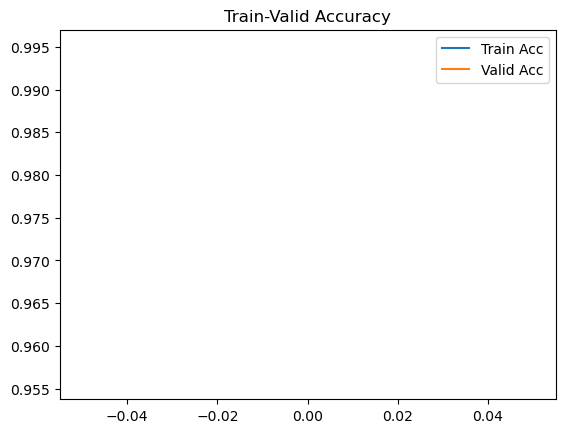

Fold: 0
Epoch 40/39


epoch 1 loss: 0.0074: 100%|███████████████████| 250/250 [01:33<00:00,  2.69it/s]

train accuracy = 0.99800
[[15952    48]
 [   16 15984]]



epoch 1 loss: 0.0173: 100%|█████████████████████| 73/73 [00:10<00:00,  7.28it/s]


validation accuracy = 0.99419
[[3990   10]
 [  17  630]]


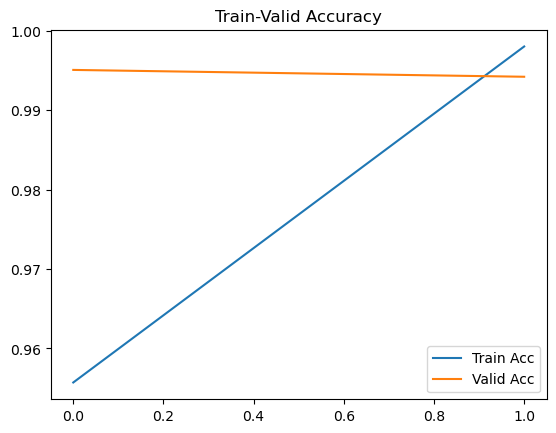

Fold: 0
Epoch 40/39


epoch 2 loss: 0.0053: 100%|███████████████████| 250/250 [01:33<00:00,  2.69it/s]

train accuracy = 0.99891
[[15979    21]
 [   14 15986]]



epoch 2 loss: 0.0156: 100%|█████████████████████| 73/73 [00:09<00:00,  7.47it/s]


validation accuracy = 0.99484
[[3994    6]
 [  18  629]]


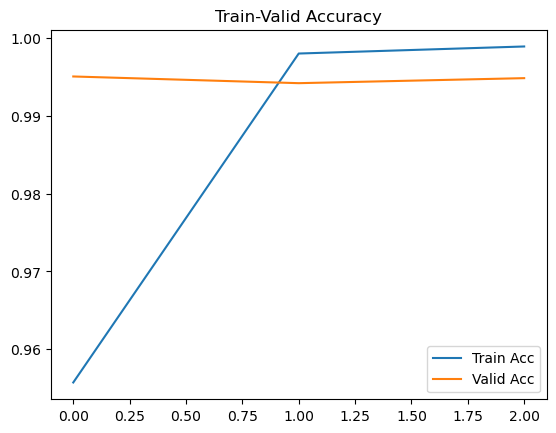

Fold: 0
Epoch 40/39


epoch 3 loss: 0.0020: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99975
[[15995     5]
 [    3 15997]]



epoch 3 loss: 0.0131: 100%|█████████████████████| 73/73 [00:10<00:00,  7.21it/s]


validation accuracy = 0.99591
[[3993    7]
 [  12  635]]


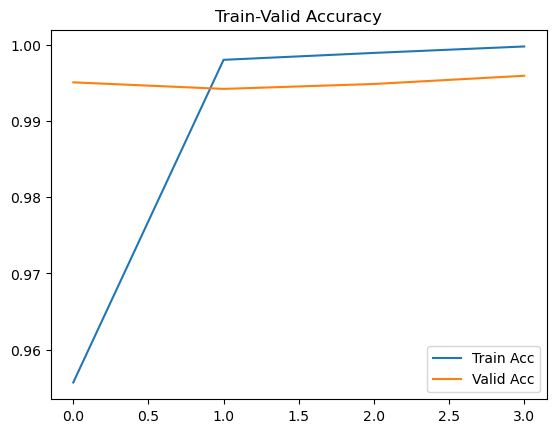

Fold: 0
Epoch 40/39


epoch 4 loss: 0.0017: 100%|███████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 0.99944
[[15988    12]
 [    6 15994]]



epoch 4 loss: 0.0161: 100%|█████████████████████| 73/73 [00:09<00:00,  7.42it/s]


validation accuracy = 0.99548
[[3991    9]
 [  12  635]]


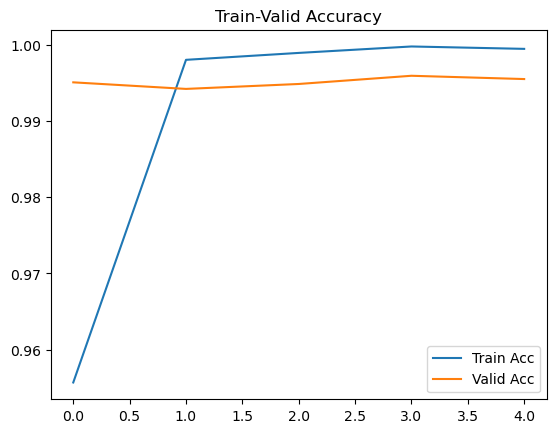

EarlyStopping counter: 1 out of 5
Best valid loss from now: 0.01305272208329582
Fold: 0
Epoch 40/39


epoch 5 loss: 0.0011: 100%|███████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 0.99962
[[15995     5]
 [    7 15993]]



epoch 5 loss: 0.0169: 100%|█████████████████████| 73/73 [00:09<00:00,  7.33it/s]


validation accuracy = 0.99505
[[3995    5]
 [  18  629]]


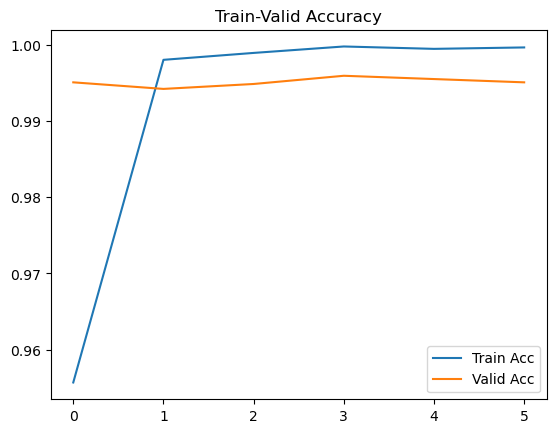

EarlyStopping counter: 2 out of 5
Best valid loss from now: 0.01305272208329582
Fold: 0
Epoch 40/39


epoch 6 loss: 0.0008: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99981
[[15997     3]
 [    3 15997]]



epoch 6 loss: 0.0180: 100%|█████████████████████| 73/73 [00:10<00:00,  7.19it/s]


validation accuracy = 0.99484
[[3992    8]
 [  16  631]]


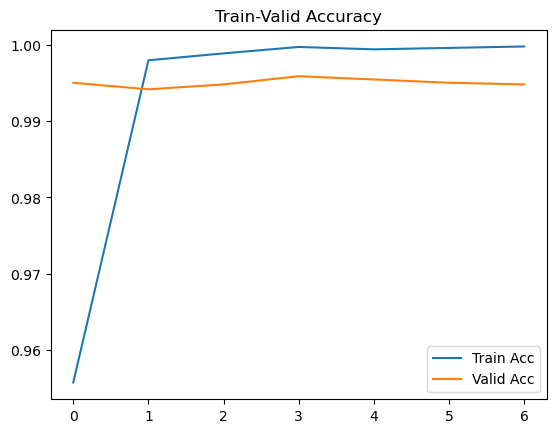

EarlyStopping counter: 3 out of 5
Best valid loss from now: 0.01305272208329582
Fold: 0
Epoch 40/39


epoch 7 loss: 0.0007: 100%|███████████████████| 250/250 [01:33<00:00,  2.66it/s]

train accuracy = 0.99978
[[15995     5]
 [    2 15998]]



epoch 7 loss: 0.0208: 100%|█████████████████████| 73/73 [00:10<00:00,  7.06it/s]


validation accuracy = 0.99505
[[3992    8]
 [  15  632]]


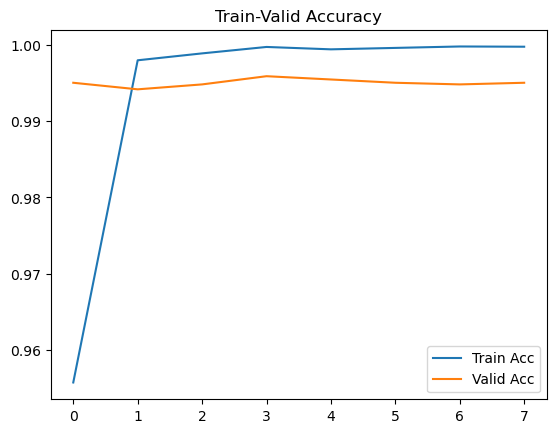

EarlyStopping counter: 4 out of 5
Best valid loss from now: 0.01305272208329582
Fold: 0
Epoch 40/39


epoch 8 loss: 0.0006: 100%|███████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 0.99981
[[15997     3]
 [    3 15997]]



epoch 8 loss: 0.0164: 100%|█████████████████████| 73/73 [00:09<00:00,  7.46it/s]


validation accuracy = 0.99484
[[3989   11]
 [  13  634]]


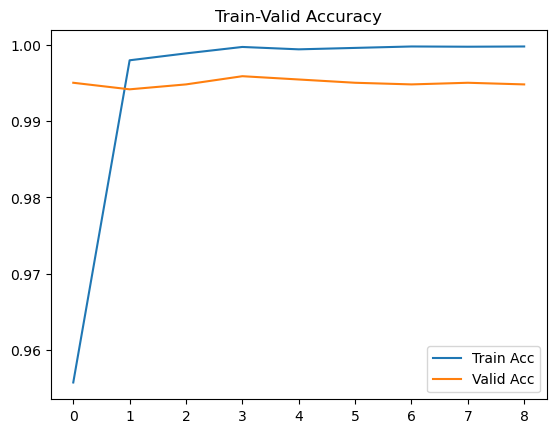

EarlyStopping counter: 5 out of 5
Best valid loss from now: 0.01305272208329582
stop called
time : 0:20:50
fold: 0_Best Epoch : 3/ 9
fold: 0_Best Train Accuracy : 0.99975
[[15995     5]
 [    3 15997]]
fold: 0_Best Valid Accuracy : 0.99591
[[3993    7]
 [  12  635]]
Training start with epoch 40 

Fold: 1
Epoch 40/39


epoch 0 loss: 0.1195: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.95259
[[15281   719]
 [  798 15202]]



epoch 0 loss: 0.0232: 100%|█████████████████████| 73/73 [00:10<00:00,  6.78it/s]


validation accuracy = 0.99397
[[3990   10]
 [  18  628]]


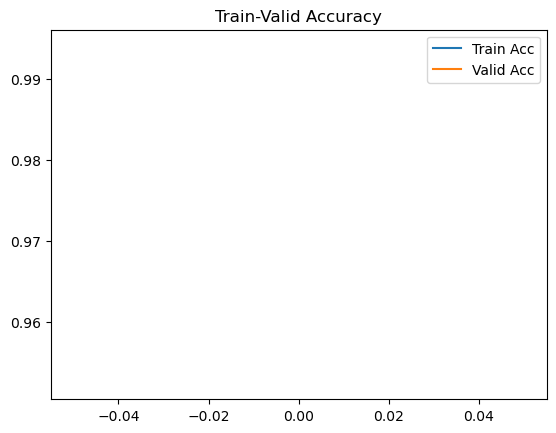

Fold: 1
Epoch 40/39


epoch 1 loss: 0.0080: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99791
[[15955    45]
 [   22 15978]]



epoch 1 loss: 0.0163: 100%|█████████████████████| 73/73 [00:09<00:00,  7.56it/s]


validation accuracy = 0.99440
[[3984   16]
 [  10  636]]


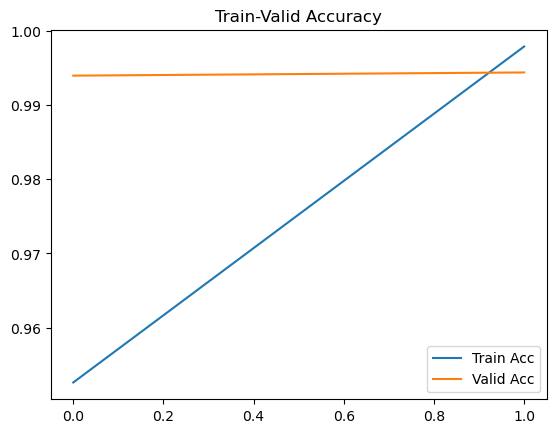

Fold: 1
Epoch 40/39


epoch 2 loss: 0.0021: 100%|███████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 0.99962
[[15993     7]
 [    5 15995]]



epoch 2 loss: 0.0146: 100%|█████████████████████| 73/73 [00:09<00:00,  7.40it/s]


validation accuracy = 0.99505
[[3991    9]
 [  14  632]]


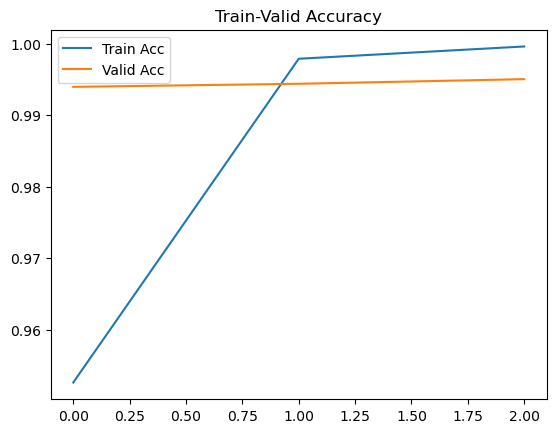

Fold: 1
Epoch 40/39


epoch 3 loss: 0.0034: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99944
[[15985    15]
 [    3 15997]]



epoch 3 loss: 0.0228: 100%|█████████████████████| 73/73 [00:09<00:00,  7.34it/s]


validation accuracy = 0.99333
[[3989   11]
 [  20  626]]


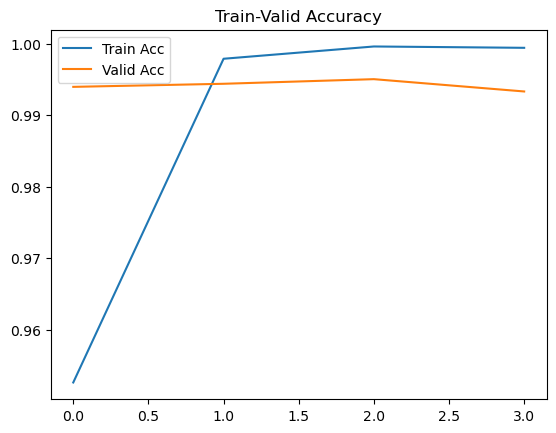

EarlyStopping counter: 1 out of 5
Best valid loss from now: 0.01451174662321286
Fold: 1
Epoch 40/39


epoch 4 loss: 0.0012: 100%|███████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 0.99981
[[15996     4]
 [    2 15998]]



epoch 4 loss: 0.0202: 100%|█████████████████████| 73/73 [00:10<00:00,  7.23it/s]


validation accuracy = 0.99440
[[3996    4]
 [  22  624]]


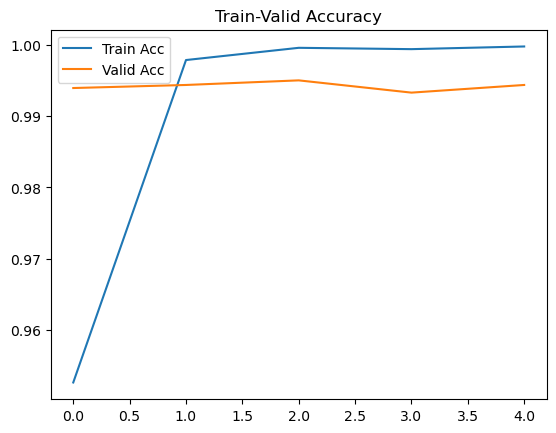

EarlyStopping counter: 2 out of 5
Best valid loss from now: 0.01451174662321286
Fold: 1
Epoch 40/39


epoch 5 loss: 0.0017: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99959
[[15992     8]
 [    5 15995]]



epoch 5 loss: 0.0232: 100%|█████████████████████| 73/73 [00:09<00:00,  7.33it/s]


validation accuracy = 0.99290
[[3993    7]
 [  26  620]]


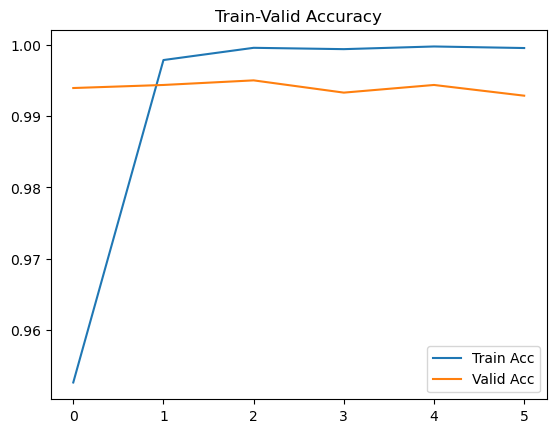

EarlyStopping counter: 3 out of 5
Best valid loss from now: 0.01451174662321286
Fold: 1
Epoch 40/39


epoch 6 loss: 0.0008: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99978
[[15997     3]
 [    4 15996]]



epoch 6 loss: 0.0191: 100%|█████████████████████| 73/73 [00:10<00:00,  7.20it/s]


validation accuracy = 0.99440
[[3992    8]
 [  18  628]]


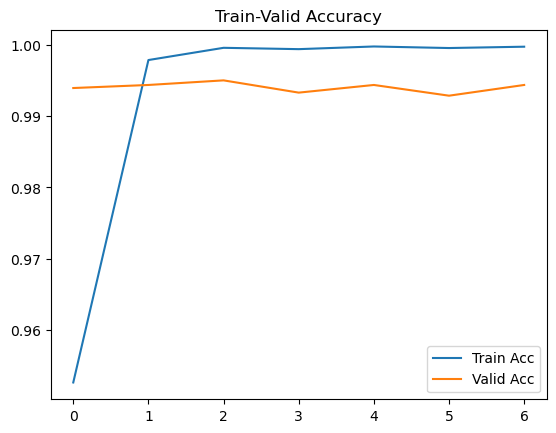

EarlyStopping counter: 4 out of 5
Best valid loss from now: 0.01451174662321286
Fold: 1
Epoch 40/39


epoch 7 loss: 0.0009: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99978
[[15996     4]
 [    3 15997]]



epoch 7 loss: 0.0219: 100%|█████████████████████| 73/73 [00:10<00:00,  7.22it/s]


validation accuracy = 0.99376
[[3994    6]
 [  23  623]]


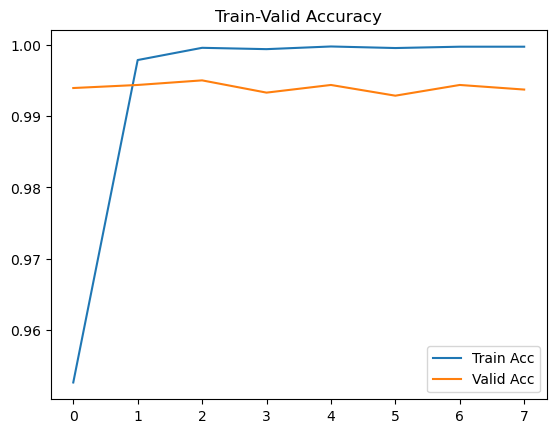

EarlyStopping counter: 5 out of 5
Best valid loss from now: 0.01451174662321286
stop called
time : 0:13:54
fold: 1_Best Epoch : 2/ 8
fold: 1_Best Train Accuracy : 0.99962
[[15993     7]
 [    5 15995]]
fold: 1_Best Valid Accuracy : 0.99505
[[3991    9]
 [  14  632]]
Training start with epoch 40 

Fold: 2
Epoch 40/39


epoch 0 loss: 0.1185: 100%|███████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 0.95384
[[15209   791]
 [  686 15314]]



epoch 0 loss: 0.0189: 100%|█████████████████████| 73/73 [00:10<00:00,  6.99it/s]


validation accuracy = 0.99419
[[3988   12]
 [  15  631]]


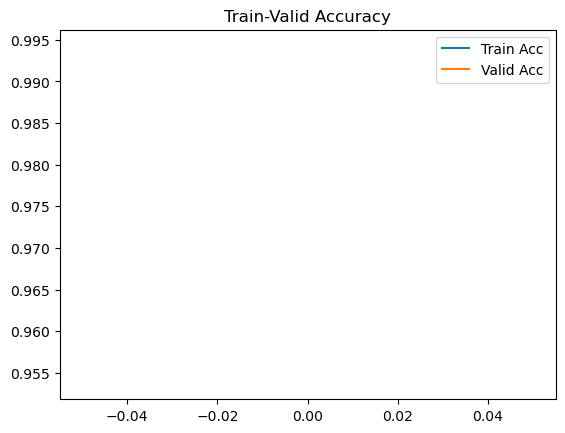

Fold: 2
Epoch 40/39


epoch 1 loss: 0.0065: 100%|███████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 0.99803
[[15952    48]
 [   15 15985]]



epoch 1 loss: 0.0155: 100%|█████████████████████| 73/73 [00:10<00:00,  7.21it/s]


validation accuracy = 0.99570
[[3995    5]
 [  15  631]]


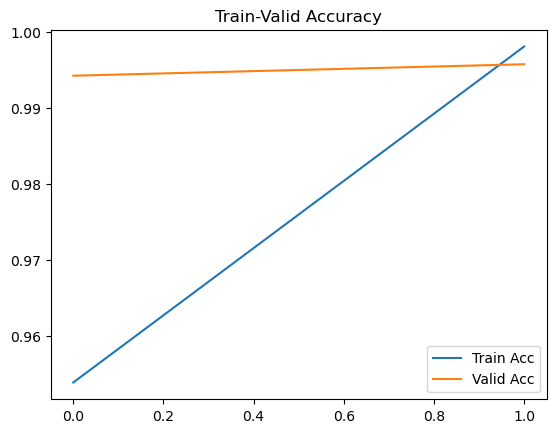

Fold: 2
Epoch 40/39


epoch 2 loss: 0.0034: 100%|███████████████████| 250/250 [01:32<00:00,  2.69it/s]

train accuracy = 0.99919
[[15981    19]
 [    7 15993]]



epoch 2 loss: 0.0162: 100%|█████████████████████| 73/73 [00:10<00:00,  7.25it/s]


validation accuracy = 0.99483
[[3991    9]
 [  15  631]]


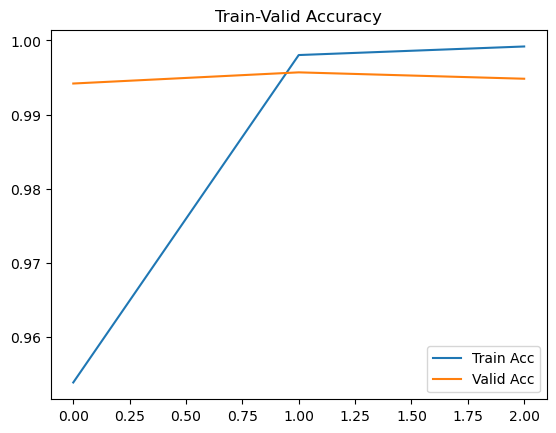

EarlyStopping counter: 1 out of 5
Best valid loss from now: 0.01538139573307963
Fold: 2
Epoch 40/39


epoch 3 loss: 0.0027: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99925
[[15985    15]
 [    9 15991]]



epoch 3 loss: 0.0179: 100%|█████████████████████| 73/73 [00:10<00:00,  6.92it/s]


validation accuracy = 0.99419
[[3994    6]
 [  21  625]]


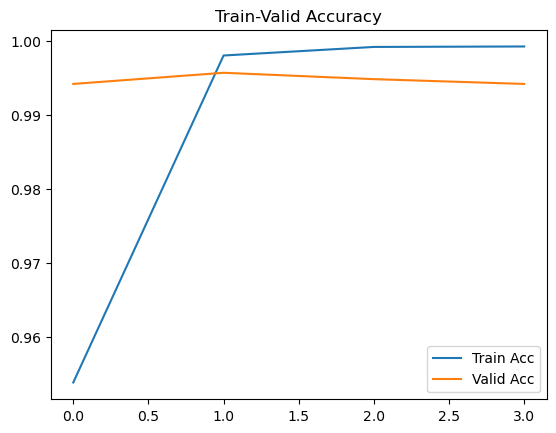

EarlyStopping counter: 2 out of 5
Best valid loss from now: 0.01538139573307963
Fold: 2
Epoch 40/39


epoch 4 loss: 0.0020: 100%|███████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 0.99966
[[15994     6]
 [    5 15995]]



epoch 4 loss: 0.0128: 100%|█████████████████████| 73/73 [00:10<00:00,  7.10it/s]


validation accuracy = 0.99634
[[3995    5]
 [  12  634]]


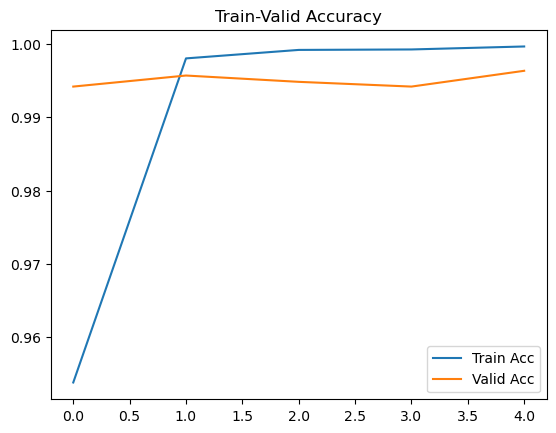

Fold: 2
Epoch 40/39


epoch 5 loss: 0.0011: 100%|███████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 0.99972
[[15995     5]
 [    4 15996]]



epoch 5 loss: 0.0109: 100%|█████████████████████| 73/73 [00:10<00:00,  6.90it/s]


validation accuracy = 0.99591
[[3994    6]
 [  13  633]]


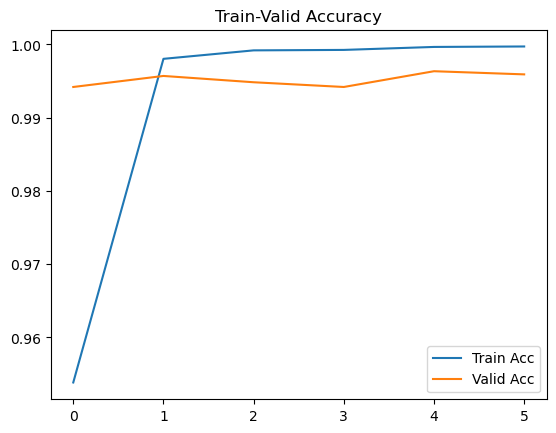

Fold: 2
Epoch 40/39


epoch 6 loss: 0.0005: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99991
[[15998     2]
 [    1 15999]]



epoch 6 loss: 0.0123: 100%|█████████████████████| 73/73 [00:10<00:00,  7.23it/s]


validation accuracy = 0.99634
[[3993    7]
 [  10  636]]


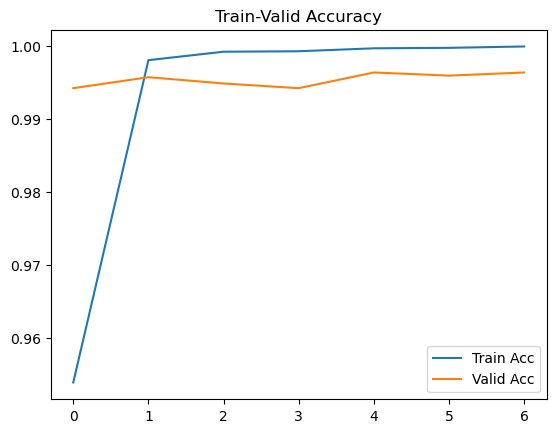

EarlyStopping counter: 1 out of 5
Best valid loss from now: 0.010852168009665073
Fold: 2
Epoch 40/39


epoch 7 loss: 0.0008: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99981
[[15996     4]
 [    2 15998]]



epoch 7 loss: 0.0168: 100%|█████████████████████| 73/73 [00:10<00:00,  7.01it/s]


validation accuracy = 0.99613
[[3988   12]
 [   6  640]]


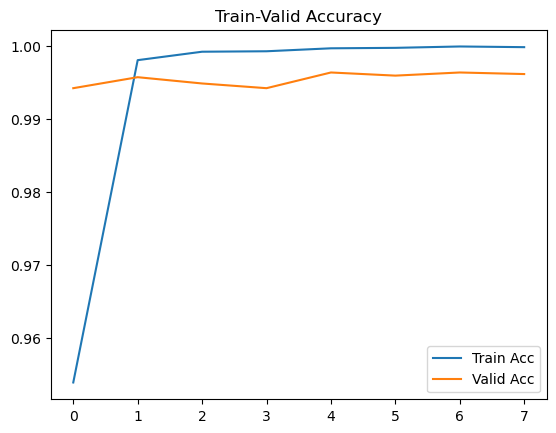

EarlyStopping counter: 2 out of 5
Best valid loss from now: 0.010852168009665073
Fold: 2
Epoch 40/39


epoch 8 loss: 0.0006: 100%|███████████████████| 250/250 [01:33<00:00,  2.69it/s]

train accuracy = 0.99987
[[15997     3]
 [    1 15999]]



epoch 8 loss: 0.0130: 100%|█████████████████████| 73/73 [00:10<00:00,  7.02it/s]


validation accuracy = 0.99591
[[3993    7]
 [  12  634]]


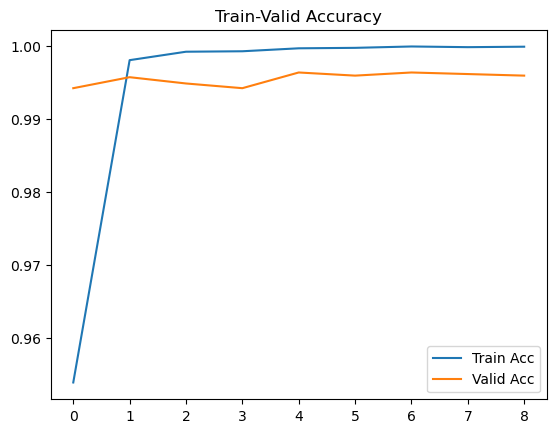

EarlyStopping counter: 3 out of 5
Best valid loss from now: 0.010852168009665073
Fold: 2
Epoch 40/39


epoch 9 loss: 0.0013: 100%|███████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 0.99962
[[15995     5]
 [    7 15993]]



epoch 9 loss: 0.0147: 100%|█████████████████████| 73/73 [00:10<00:00,  7.03it/s]


validation accuracy = 0.99591
[[3985   15]
 [   4  642]]


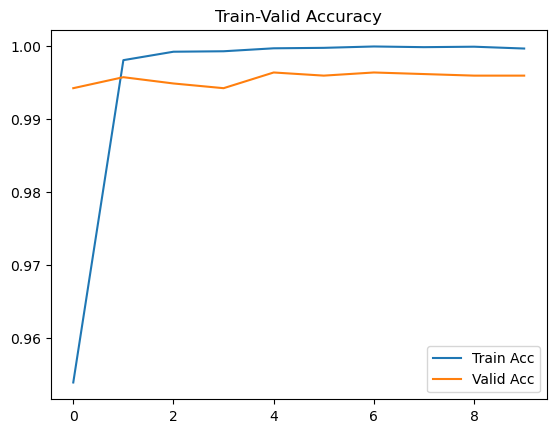

EarlyStopping counter: 4 out of 5
Best valid loss from now: 0.010852168009665073
Fold: 2
Epoch 40/39


epoch 10 loss: 0.0004: 100%|██████████████████| 250/250 [01:33<00:00,  2.69it/s]

train accuracy = 0.99984
[[15996     4]
 [    1 15999]]



epoch 10 loss: 0.0134: 100%|████████████████████| 73/73 [00:10<00:00,  7.13it/s]


validation accuracy = 0.99591
[[3997    3]
 [  16  630]]


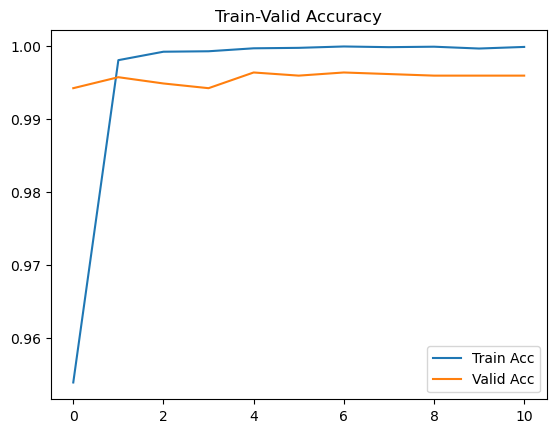

EarlyStopping counter: 5 out of 5
Best valid loss from now: 0.010852168009665073
stop called
time : 0:19:08
fold: 2_Best Epoch : 4/ 11
fold: 2_Best Train Accuracy : 0.99966
[[15994     6]
 [    5 15995]]
fold: 2_Best Valid Accuracy : 0.99634
[[3995    5]
 [  12  634]]
Training start with epoch 40 

Fold: 3
Epoch 40/39


epoch 0 loss: 0.1223: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.94716
[[15083   917]
 [  774 15226]]



epoch 0 loss: 0.0201: 100%|█████████████████████| 73/73 [00:10<00:00,  7.04it/s]


validation accuracy = 0.99268
[[3974   26]
 [   8  638]]


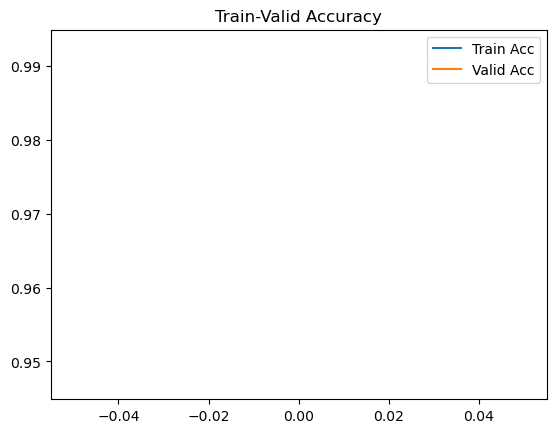

Fold: 3
Epoch 40/39


epoch 1 loss: 0.0084: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99741
[[15944    56]
 [   27 15973]]



epoch 1 loss: 0.0110: 100%|█████████████████████| 73/73 [00:10<00:00,  7.13it/s]


validation accuracy = 0.99570
[[3987   13]
 [   7  639]]


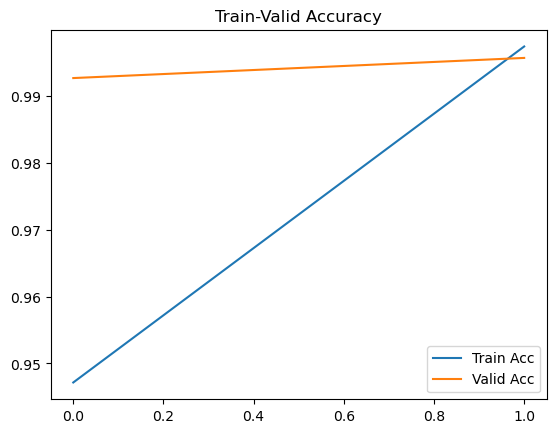

Fold: 3
Epoch 40/39


epoch 2 loss: 0.0035: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99919
[[15984    16]
 [   10 15990]]



epoch 2 loss: 0.0095: 100%|█████████████████████| 73/73 [00:10<00:00,  7.05it/s]


validation accuracy = 0.99634
[[3988   12]
 [   5  641]]


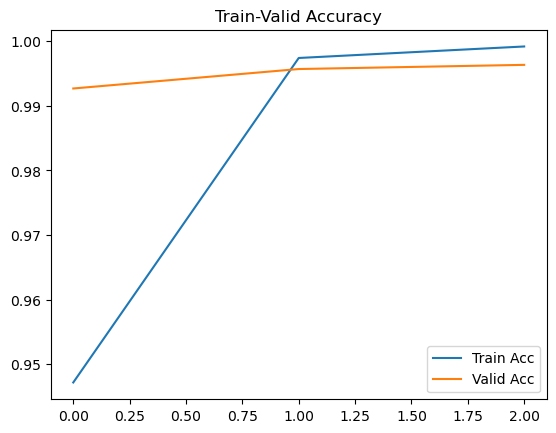

Fold: 3
Epoch 40/39


epoch 3 loss: 0.0021: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99962
[[15990    10]
 [    2 15998]]



epoch 3 loss: 0.0098: 100%|█████████████████████| 73/73 [00:10<00:00,  7.28it/s]


validation accuracy = 0.99613
[[3996    4]
 [  14  632]]


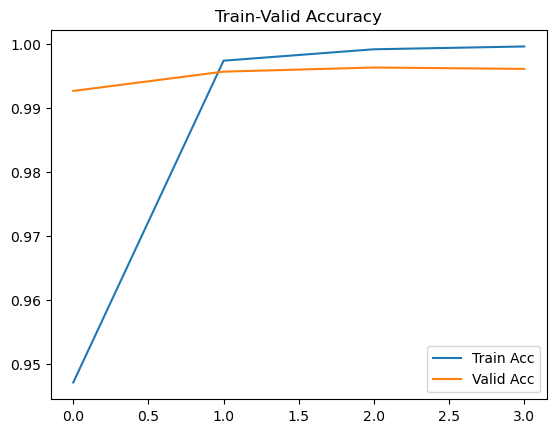

EarlyStopping counter: 1 out of 5
Best valid loss from now: 0.009598116234223174
Fold: 3
Epoch 40/39


epoch 4 loss: 0.0016: 100%|███████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 0.99944
[[15989    11]
 [    7 15993]]



epoch 4 loss: 0.0065: 100%|█████████████████████| 73/73 [00:10<00:00,  7.07it/s]


validation accuracy = 0.99699
[[3992    8]
 [   6  640]]


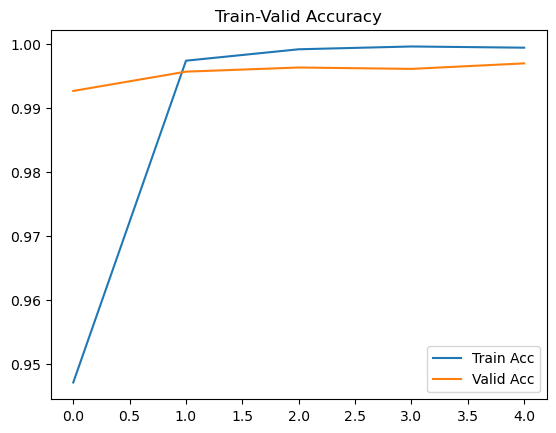

Fold: 3
Epoch 40/39


epoch 5 loss: 0.0011: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99975
[[15994     6]
 [    2 15998]]



epoch 5 loss: 0.0111: 100%|█████████████████████| 73/73 [00:10<00:00,  7.15it/s]


validation accuracy = 0.99483
[[3994    6]
 [  18  628]]


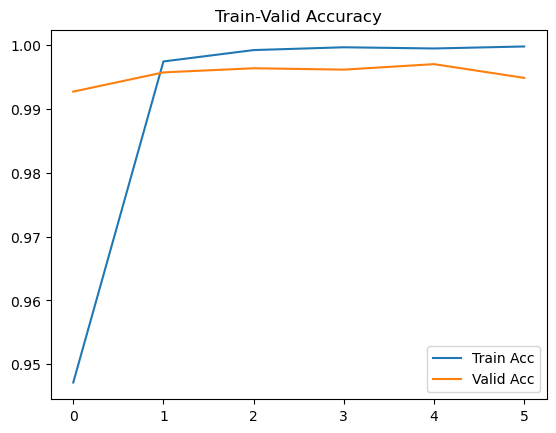

EarlyStopping counter: 1 out of 5
Best valid loss from now: 0.006474693335591949
Fold: 3
Epoch 40/39


epoch 6 loss: 0.0005: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99987
[[15998     2]
 [    2 15998]]



epoch 6 loss: 0.0093: 100%|█████████████████████| 73/73 [00:10<00:00,  7.15it/s]


validation accuracy = 0.99634
[[3988   12]
 [   5  641]]


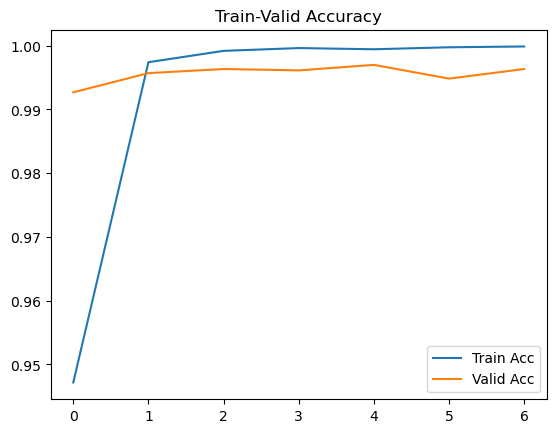

EarlyStopping counter: 2 out of 5
Best valid loss from now: 0.006474693335591949
Fold: 3
Epoch 40/39


epoch 7 loss: 0.0013: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99978
[[15995     5]
 [    2 15998]]



epoch 7 loss: 0.0092: 100%|█████████████████████| 73/73 [00:10<00:00,  7.10it/s]


validation accuracy = 0.99656
[[3995    5]
 [  11  635]]


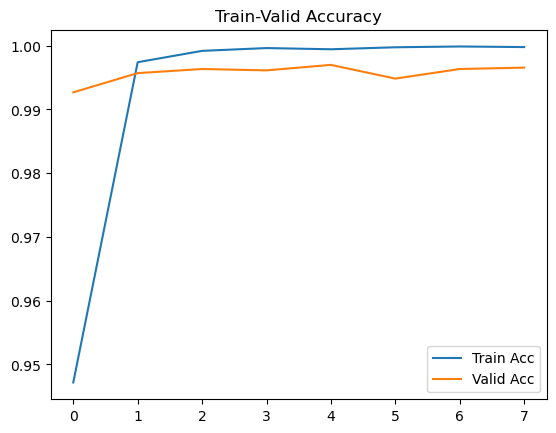

EarlyStopping counter: 3 out of 5
Best valid loss from now: 0.006474693335591949
Fold: 3
Epoch 40/39


epoch 8 loss: 0.0003: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99994
[[15999     1]
 [    1 15999]]



epoch 8 loss: 0.0059: 100%|█████████████████████| 73/73 [00:10<00:00,  7.15it/s]


validation accuracy = 0.99785
[[3996    4]
 [   6  640]]


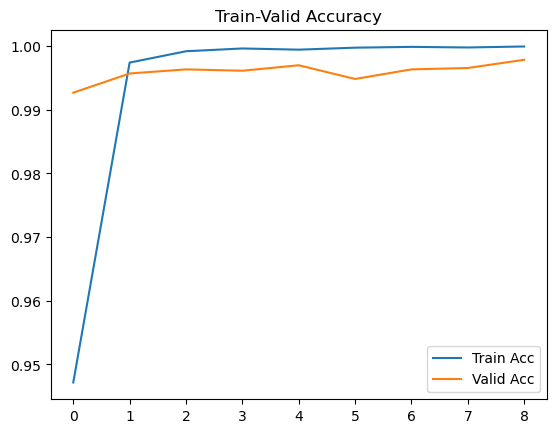

Fold: 3
Epoch 40/39


epoch 9 loss: 0.0006: 100%|███████████████████| 250/250 [01:33<00:00,  2.66it/s]

train accuracy = 0.99987
[[15998     2]
 [    2 15998]]



epoch 9 loss: 0.0080: 100%|█████████████████████| 73/73 [00:09<00:00,  7.30it/s]


validation accuracy = 0.99634
[[3991    9]
 [   8  638]]


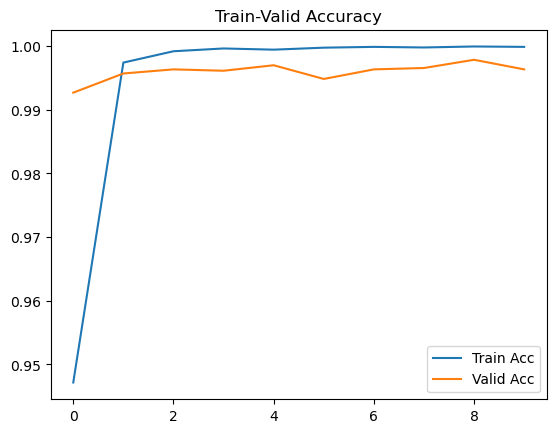

EarlyStopping counter: 1 out of 5
Best valid loss from now: 0.005847886557316935
Fold: 3
Epoch 40/39


epoch 10 loss: 0.0002: 100%|██████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 0.99997
[[15999     1]
 [    0 16000]]



epoch 10 loss: 0.0075: 100%|████████████████████| 73/73 [00:10<00:00,  7.21it/s]


validation accuracy = 0.99656
[[3995    5]
 [  11  635]]


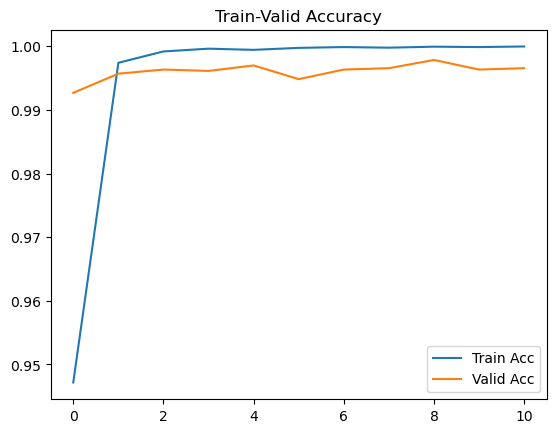

EarlyStopping counter: 2 out of 5
Best valid loss from now: 0.005847886557316935
Fold: 3
Epoch 40/39


epoch 11 loss: 0.0001: 100%|██████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 1.00000
[[16000     0]
 [    0 16000]]



epoch 11 loss: 0.0083: 100%|████████████████████| 73/73 [00:10<00:00,  7.29it/s]


validation accuracy = 0.99634
[[3994    6]
 [  11  635]]


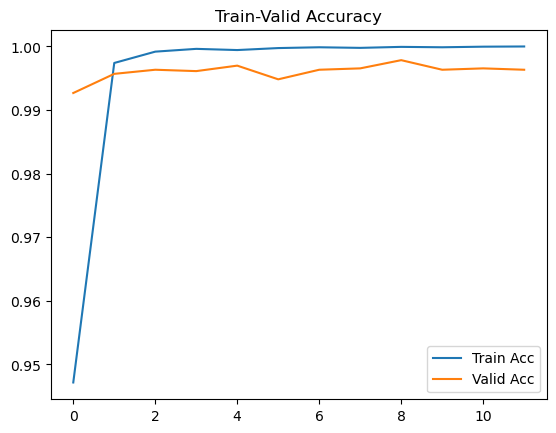

EarlyStopping counter: 3 out of 5
Best valid loss from now: 0.005847886557316935
Fold: 3
Epoch 40/39


epoch 12 loss: 0.0003: 100%|██████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 0.99991
[[15999     1]
 [    2 15998]]



epoch 12 loss: 0.0139: 100%|████████████████████| 73/73 [00:10<00:00,  7.12it/s]


validation accuracy = 0.99526
[[3995    5]
 [  17  629]]


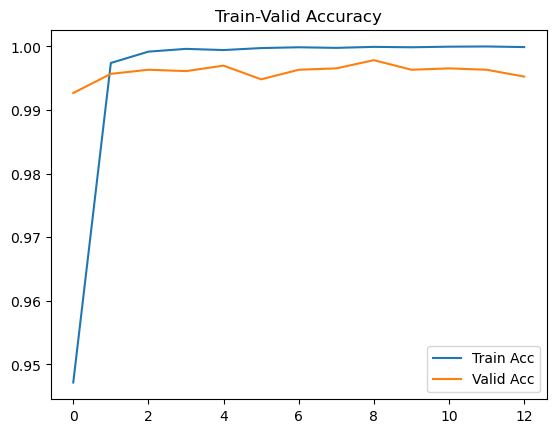

EarlyStopping counter: 4 out of 5
Best valid loss from now: 0.005847886557316935
Fold: 3
Epoch 40/39


epoch 13 loss: 0.0002: 100%|██████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 1.00000
[[16000     0]
 [    0 16000]]



epoch 13 loss: 0.0078: 100%|████████████████████| 73/73 [00:10<00:00,  6.95it/s]


validation accuracy = 0.99742
[[3994    6]
 [   6  640]]


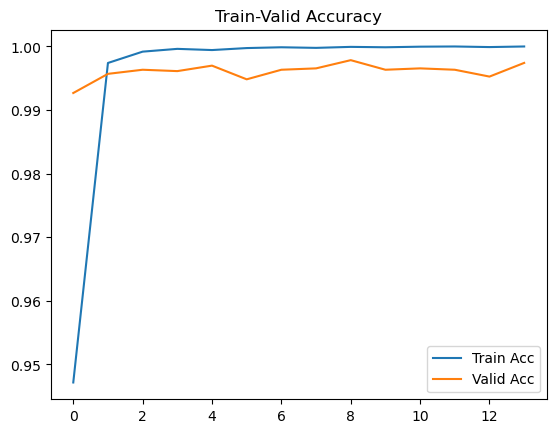

EarlyStopping counter: 5 out of 5
Best valid loss from now: 0.005847886557316935
stop called
time : 0:24:23
fold: 3_Best Epoch : 8/ 14
fold: 3_Best Train Accuracy : 0.99994
[[15999     1]
 [    1 15999]]
fold: 3_Best Valid Accuracy : 0.99785
[[3996    4]
 [   6  640]]
Training start with epoch 40 

Fold: 4
Epoch 40/39


epoch 0 loss: 0.1191: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.95081
[[15261   739]
 [  835 15165]]



epoch 0 loss: 0.0234: 100%|█████████████████████| 73/73 [00:10<00:00,  7.09it/s]


validation accuracy = 0.99333
[[3983   17]
 [  14  632]]


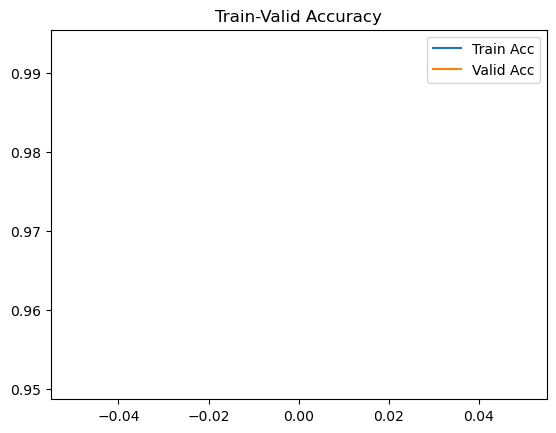

Fold: 4
Epoch 40/39


epoch 1 loss: 0.0070: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99819
[[15962    38]
 [   20 15980]]



epoch 1 loss: 0.0172: 100%|█████████████████████| 73/73 [00:10<00:00,  7.20it/s]


validation accuracy = 0.99419
[[3990   10]
 [  17  629]]


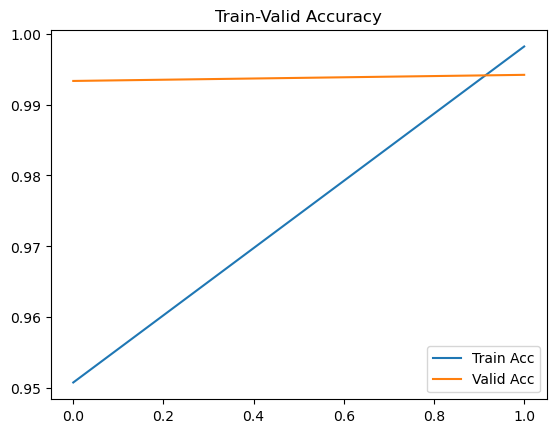

Fold: 4
Epoch 40/39


epoch 2 loss: 0.0044: 100%|███████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 0.99884
[[15982    18]
 [   19 15981]]



epoch 2 loss: 0.0186: 100%|█████████████████████| 73/73 [00:09<00:00,  7.42it/s]


validation accuracy = 0.99419
[[3987   13]
 [  14  632]]


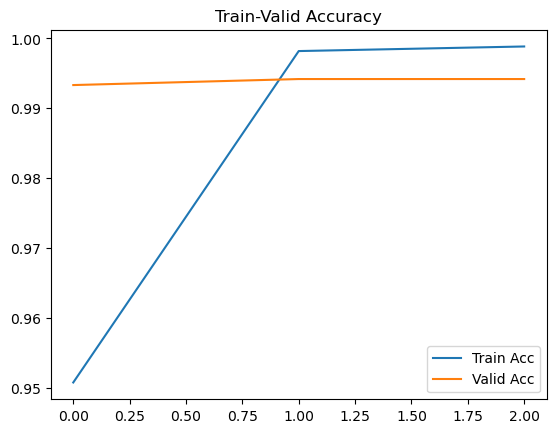

EarlyStopping counter: 1 out of 5
Best valid loss from now: 0.01716939925035934
Fold: 4
Epoch 40/39


epoch 3 loss: 0.0026: 100%|███████████████████| 250/250 [01:33<00:00,  2.66it/s]

train accuracy = 0.99962
[[15992     8]
 [    4 15996]]



epoch 3 loss: 0.0157: 100%|█████████████████████| 73/73 [00:10<00:00,  7.01it/s]


validation accuracy = 0.99548
[[3990   10]
 [  11  635]]


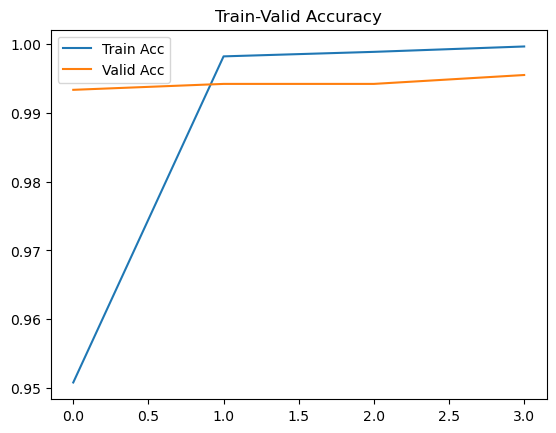

Fold: 4
Epoch 40/39


epoch 4 loss: 0.0017: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99984
[[15998     2]
 [    3 15997]]



epoch 4 loss: 0.0179: 100%|█████████████████████| 73/73 [00:10<00:00,  6.82it/s]


validation accuracy = 0.99419
[[3995    5]
 [  22  624]]


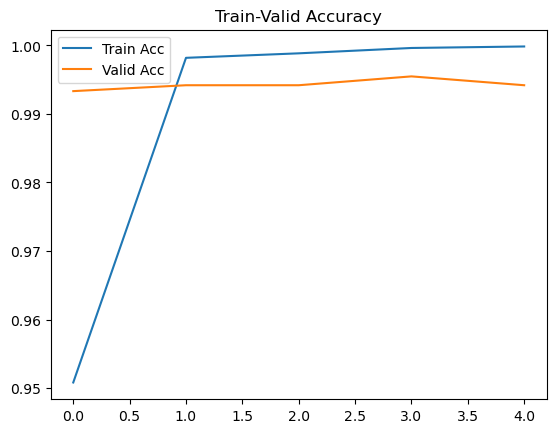

EarlyStopping counter: 1 out of 5
Best valid loss from now: 0.01585265519530018
Fold: 4
Epoch 40/39


epoch 5 loss: 0.0017: 100%|███████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 0.99944
[[15992     8]
 [   10 15990]]



epoch 5 loss: 0.0207: 100%|█████████████████████| 73/73 [00:10<00:00,  7.08it/s]


validation accuracy = 0.99397
[[3997    3]
 [  25  621]]


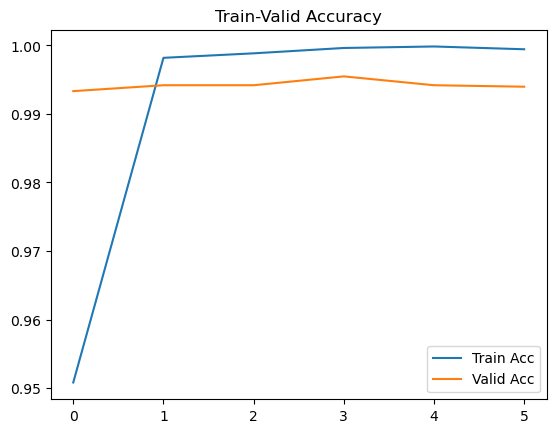

EarlyStopping counter: 2 out of 5
Best valid loss from now: 0.01585265519530018
Fold: 4
Epoch 40/39


epoch 6 loss: 0.0010: 100%|███████████████████| 250/250 [01:33<00:00,  2.67it/s]

train accuracy = 0.99987
[[15998     2]
 [    2 15998]]



epoch 6 loss: 0.0163: 100%|█████████████████████| 73/73 [00:10<00:00,  7.13it/s]


validation accuracy = 0.99505
[[3991    9]
 [  14  632]]


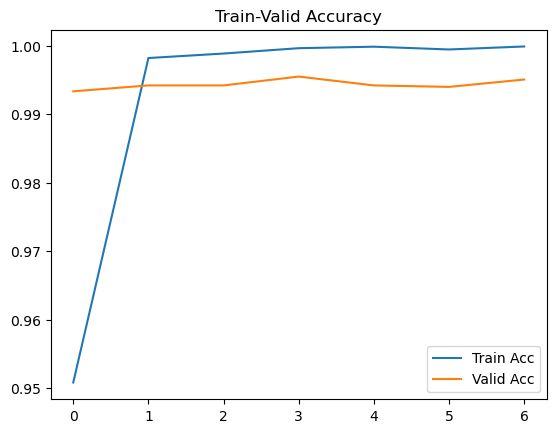

EarlyStopping counter: 3 out of 5
Best valid loss from now: 0.01585265519530018
Fold: 4
Epoch 40/39


epoch 7 loss: 0.0008: 100%|███████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 0.99969
[[15995     5]
 [    5 15995]]



epoch 7 loss: 0.0178: 100%|█████████████████████| 73/73 [00:10<00:00,  7.10it/s]


validation accuracy = 0.99505
[[3994    6]
 [  17  629]]


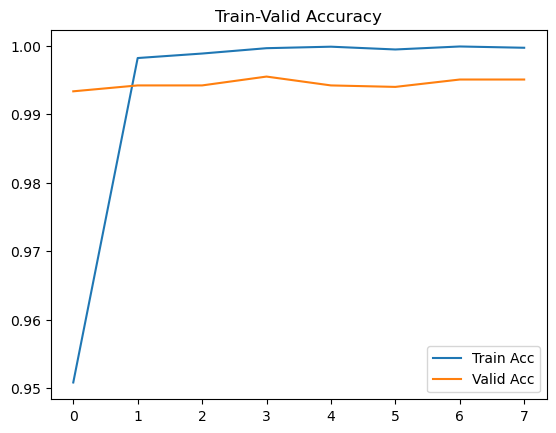

EarlyStopping counter: 4 out of 5
Best valid loss from now: 0.01585265519530018
Fold: 4
Epoch 40/39


epoch 8 loss: 0.0003: 100%|███████████████████| 250/250 [01:33<00:00,  2.68it/s]

train accuracy = 0.99987
[[15997     3]
 [    1 15999]]



epoch 8 loss: 0.0196: 100%|█████████████████████| 73/73 [00:10<00:00,  6.92it/s]


validation accuracy = 0.99548
[[3996    4]
 [  17  629]]


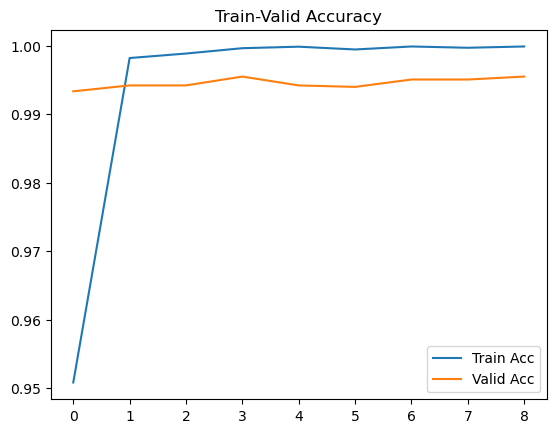

EarlyStopping counter: 5 out of 5
Best valid loss from now: 0.01585265519530018
stop called
time : 0:15:41
fold: 4_Best Epoch : 3/ 9
fold: 4_Best Train Accuracy : 0.99962
[[15992     8]
 [    4 15996]]
fold: 4_Best Valid Accuracy : 0.99548
[[3990   10]
 [  11  635]]


In [53]:
%run classification_baseline.ipynb

In [52]:
dist.destroy_process_group()